# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.compose import ColumnTransformer, make_column_transformer

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [35]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [36]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [38]:
df.shape

(41188, 21)

In [45]:
df.rename(columns = {'y':'deposit'}, inplace = True)

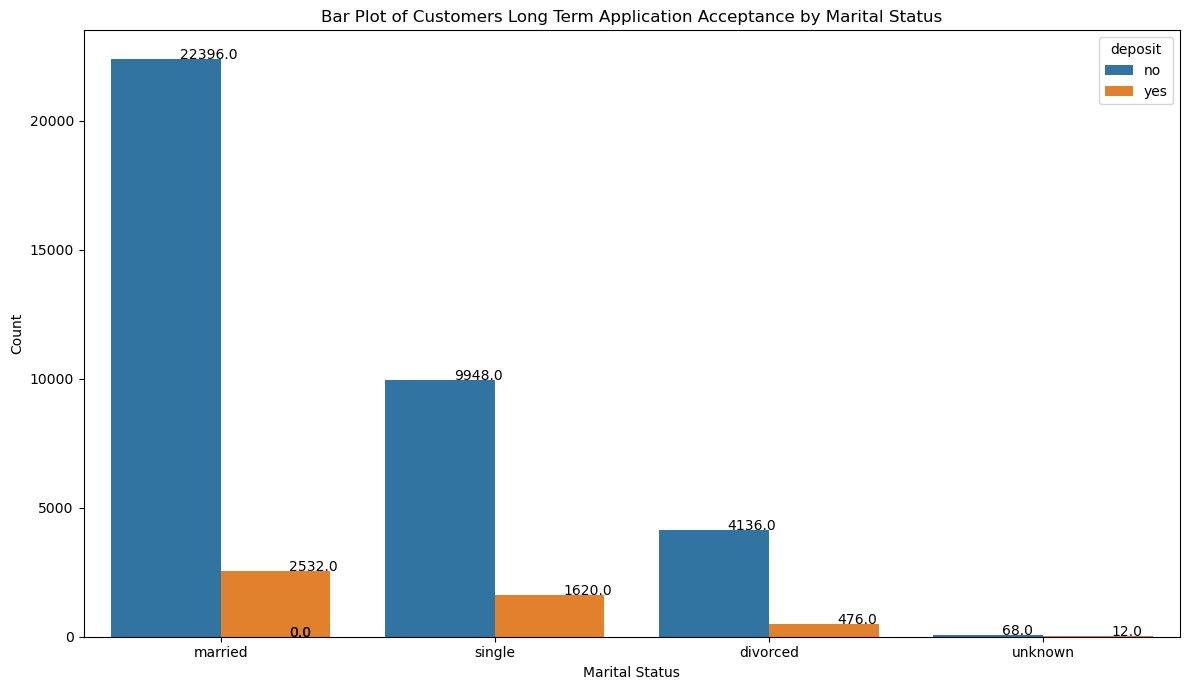

<Figure size 1200x700 with 0 Axes>

In [47]:
plt.rcParams["figure.figsize"] = [12, 7]
plt.rcParams["figure.autolayout"] = True
ax = sns.countplot(x ='marital', hue = "deposit", data = df)

# Adding Title to the Plot
ax.set_title('Bar Plot of Customers Long Term Application Acceptance by Marital Status')

for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

# Setting the X and Y labels
ax.set_xlabel('Marital Status')
ax.set_ylabel('Count')
 
# Show the plot
plt.show()
plt.savefig('./images/customersbymaritalstatus.png')

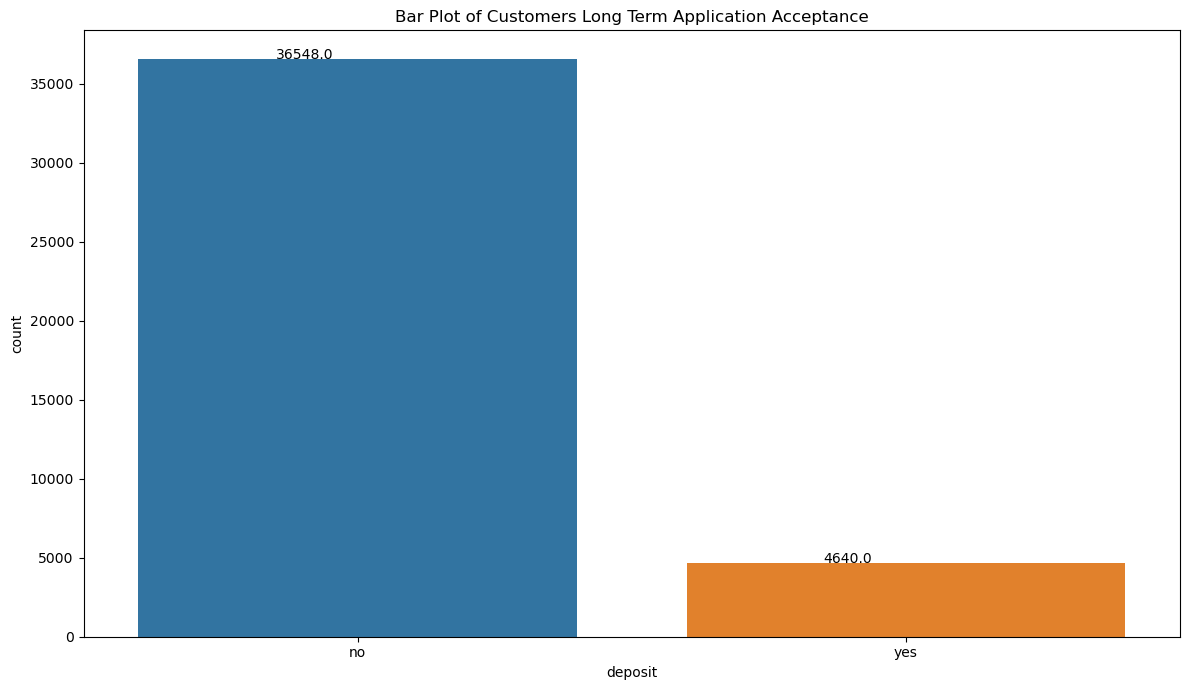

<Figure size 1200x700 with 0 Axes>

In [49]:
# Bar plot of customer count that said yes to term deposit vs no
plt.rcParams["figure.figsize"] = [12, 7]
plt.rcParams["figure.autolayout"] = True

# count plot on two categorical variable
ax = sns.countplot(x ='deposit', hue = "deposit", data = df)

# Adding Title to the Plot
ax.set_title('Bar Plot of Customers Long Term Application Acceptance')

for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
 
# Show the plot
plt.show()
plt.savefig('./images/customers_longterm.png')

In [51]:
# removing null
df.isna().any()

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
deposit           False
dtype: bool

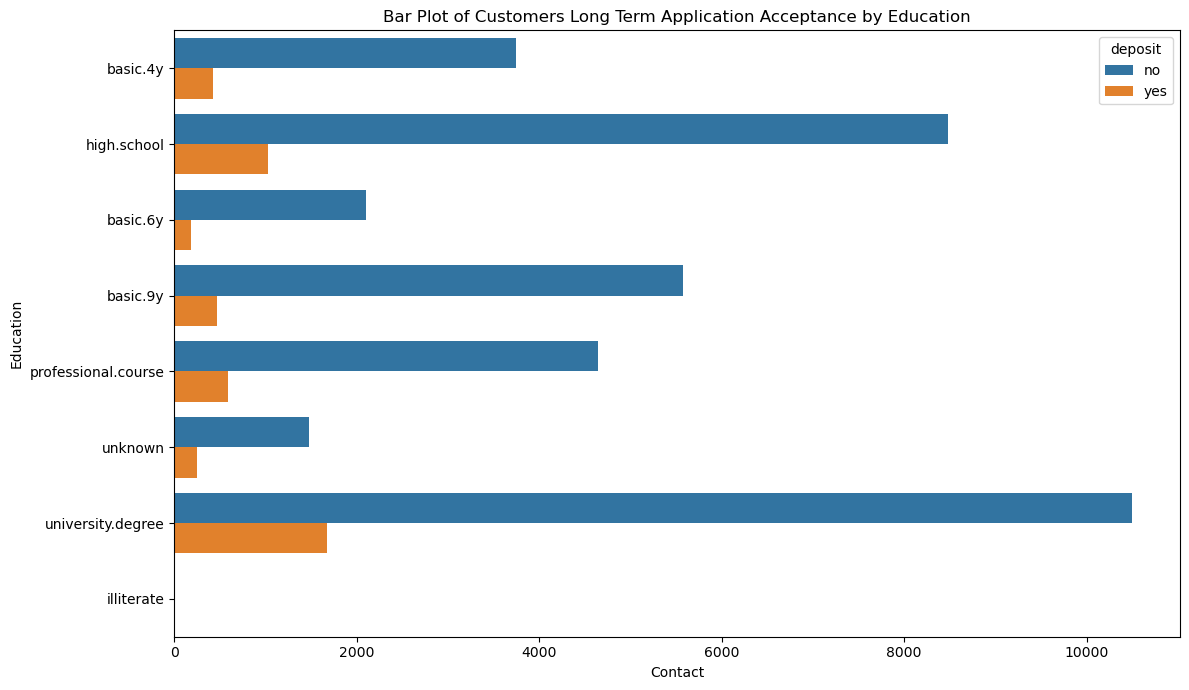

<Figure size 1200x700 with 0 Axes>

In [53]:
ax = sns.countplot(y ='education', hue = "deposit", data = df)

# Adding Title to the Plot
ax.set_title('Bar Plot of Customers Long Term Application Acceptance by Education')

# Setting the X and Y labels
ax.set_xlabel('Contact')
ax.set_ylabel('Education')

# Show the plot
plt.show()
plt.savefig('./images/customersbyeducation.png')

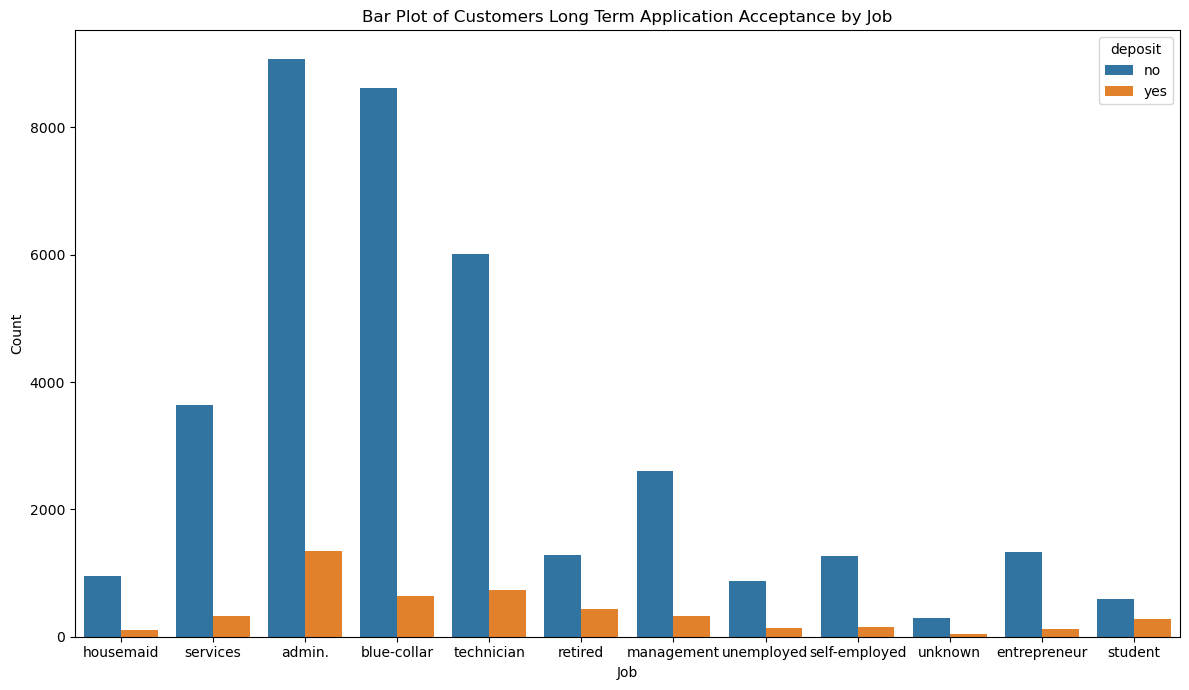

In [55]:
ax = sns.countplot(x ='job', hue = "deposit", data = df)

# Adding Title to the Plot
ax.set_title('Bar Plot of Customers Long Term Application Acceptance by Job')

# Setting the X and Y labels
ax.set_xlabel('Job')
ax.set_ylabel('Count')

# Show the plot
plt.show()

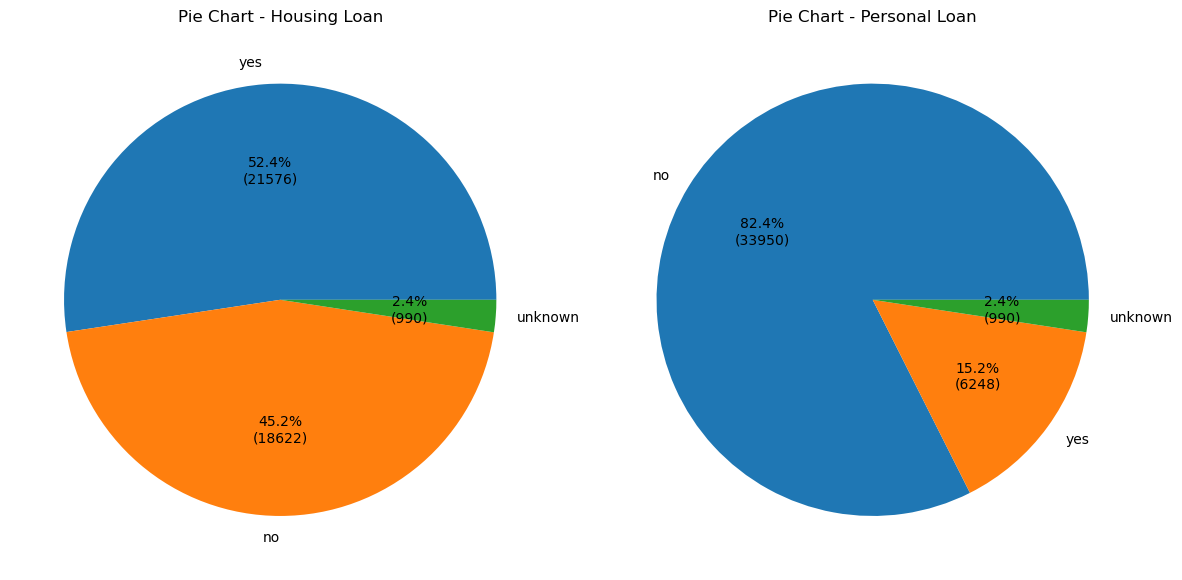

<Figure size 1200x700 with 0 Axes>

In [57]:
def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%\n({v:d})'.format(pct, v=val)
        return my_format

#plt.pie(df['LoanStatus'].value_counts().values, labels=df['LoanStatus'].value_counts().index, autopct=fmt)

# create a figure with two subplots
#fig, ax = plt.subplots(figsize=(12,8))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,7))

# plot each pie chart in a separate subplot

ax1.set_title('Pie Chart - Housing Loan')
s = df['housing'].value_counts()
ax1.pie(s,labels = s.index,  autopct=autopct_format(s))

ax2.set_title('Pie Chart - Personal Loan')
s1 = df['loan'].value_counts()
ax2.pie(s1,labels = s1.index, autopct=autopct_format(s1))

plt.show()
plt.savefig('./images/pie_housing_personal_loans.png')

In [59]:
df['default'].value_counts()

default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64

In [61]:
value='yes'
bank_df=df.query("deposit == @value")
bank_df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
75,41,blue-collar,divorced,basic.4y,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
83,49,entrepreneur,married,university.degree,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
88,49,technician,married,basic.9y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
129,41,technician,married,professional.course,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
139,45,blue-collar,married,basic.9y,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
182,42,blue-collar,married,basic.9y,no,yes,yes,telephone,may,mon,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
286,39,housemaid,married,basic.9y,no,yes,no,telephone,may,mon,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
388,28,unknown,single,unknown,unknown,yes,yes,telephone,may,tue,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
389,44,services,married,high.school,no,yes,no,telephone,may,tue,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
446,42,technician,married,professional.course,no,no,no,telephone,may,tue,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes


In [63]:
print('Number of Successful campaign records', bank_df.shape)

Number of Successful campaign records (4640, 21)


Observations
Reviewing the plots where the customer signed up for the Bank Product/Marketing campaign was successful, you can observe the following:

Marital Status - Bank was successful with customers that were married followed by single folks
On Education, university degree folks said yes to the bank loan product
For Job, bank had the most success with folks in admin role which is very broad, followed by Technician, then blue-collar
Finally, marketing campaign was more successful with folks that used Cellular phones

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

This dataset was provided for a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  The analysis of the data shows that the marketing campaign was not very successful in getting customers to sign up for the long term deposit product.

From a business objective, the task of this Machine Learning project is to determine which factors could lead to a higher success rate, for example,

How does loan products have a positive impact on customer success rate?, for example, do we concentrate on customers with Housing loan?
Are we going to have a better success rate with customers with “university degree”?
How does the contact method (i.e., cellular) affect whether the success rate for long term loan products?

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [67]:
feature_cols = [
    'job', 'marital', 'education', 'default', 'housing',
    'loan', 'contact'
]


X = df[feature_cols]
y = df['deposit']

X.head(10)

,job,marital,education,default,housing,loan,contact
0,housemaid,married,basic.4y,no,no,no,telephone
1,services,married,high.school,unknown,no,no,telephone
2,services,married,high.school,no,yes,no,telephone
3,admin.,married,basic.6y,no,no,no,telephone
4,services,married,high.school,no,no,yes,telephone
5,services,married,basic.9y,unknown,no,no,telephone
6,admin.,married,professional.course,no,no,no,telephone
7,blue-collar,married,unknown,unknown,no,no,telephone
8,technician,single,professional.course,no,yes,no,telephone
9,services,single,high.school,no,yes,no,telephone


In [69]:
X['contact'].value_counts()

contact
cellular     26144
telephone    15044
Name: count, dtype: int64

In [71]:
column_trans = make_column_transformer((OneHotEncoder(handle_unknown='ignore'),
                                        ['job', 'marital', 'education','default','contact']),
                                      (OrdinalEncoder(), ['housing','loan']),
                                      remainder='passthrough')

column_trans.fit(X)

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['job', 'marital', 'education', 'default',
                                  'contact']),
                                ('ordinalencoder', OrdinalEncoder(),
                                 ['housing', 'loan'])])

In [73]:
le = LabelEncoder()
le.fit_transform(y)

array([0, 0, 0, ..., 0, 1, 0])

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [77]:
from sklearn.pipeline import Pipeline

dtc_pipe = Pipeline ([
    ('transformer', column_trans),
    ('scale', StandardScaler(with_mean=False)),
    ('model', DecisionTreeClassifier(max_depth=5))
])

In [79]:
%%time
# Train the classifiers
dtc = dtc_pipe.fit(X_train, y_train)

# use the model to predict the class labels of the test set:
dtc_pred = dtc.predict(X_test)

CPU times: user 221 ms, sys: 11.7 ms, total: 233 ms
Wall time: 280 ms


In [81]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
accuracy = accuracy_score(y_test, dtc_pred)
precision = precision_score(y_test, dtc_pred, average='macro')
recall = recall_score(y_test, dtc_pred, average='macro')
f1 = f1_score(y_test, dtc_pred, average='macro')

print("Accuracy: {:.6f}".format(accuracy))
print("Precision: {:.6f}".format(precision))
print("Recall: {:.6f}".format(recall))
print("F1-score: {:.6f}".format(f1))

Accuracy: 0.887513
Precision: 0.443792
Recall: 0.499954
F1-score: 0.470202


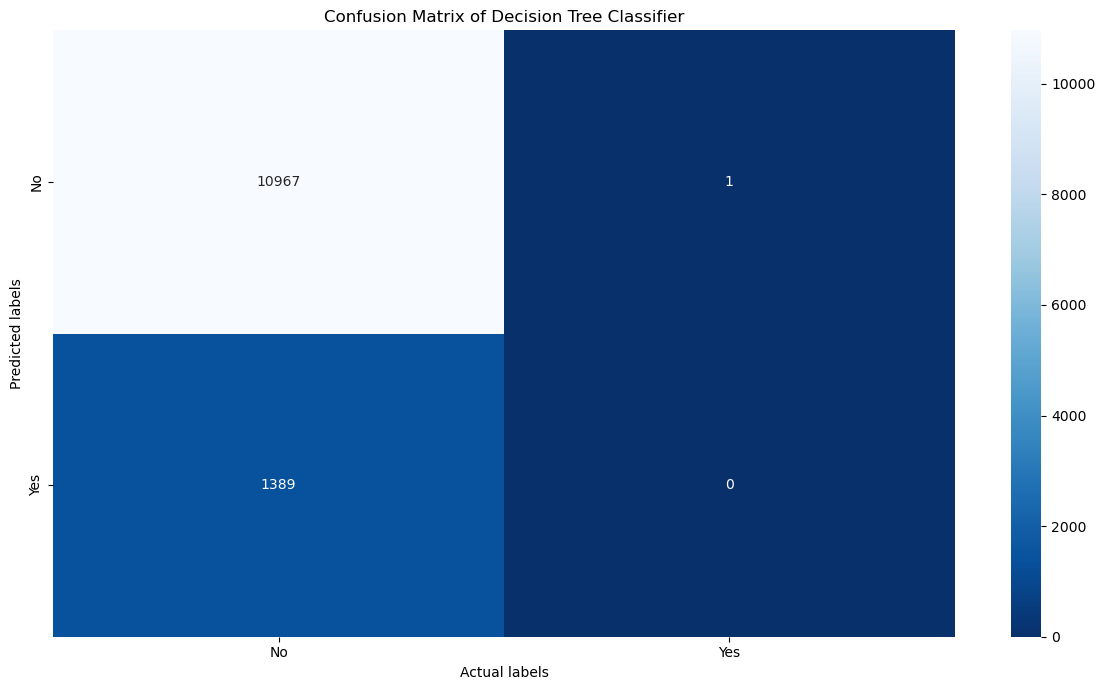

<Figure size 1200x700 with 0 Axes>

In [83]:
import seaborn as sns
ax= plt.subplot()
conf_matrix = confusion_matrix(y_test, dtc_pred)
sns.heatmap(conf_matrix, annot = True, cmap = 'Blues_r', fmt = 'd', ax=ax)

# labels, title and ticks
ax.set_xlabel('Actual labels');ax.set_ylabel('Predicted labels'); 
ax.set_title('Confusion Matrix of Decision Tree Classifier'); 
ax.xaxis.set_ticklabels(['No', 'Yes']); 
ax.yaxis.set_ticklabels(['No', 'Yes']);

#plt.xlabel('Predicted')
#plt.ylabel('Actual')
plt.show()
plt.savefig('./images/confusionmatrix.png')

A Confusion matrix is an N x N matrix used for evaluating the performance of a classification model, where N is the number of target classes. The matrix compares the actual target values with those predicted by the machine learning model. A good model is one which has high TP and TN rates, while low FP and FN rates.

With the confusion matrix above for the DecisionTreeClassifier, it has a high number of TP rates with no TN. This combined with an accuracy rate of 0.89 indicates that the model is good although the recall and precision values are at 0.5 and below 0.5 respectively. Definitions below:

A low recall score (<0.5) means your classifier has a high number of False negatives which can be an outcome of imbalanced class or untuned model hyperparameters
A low precision score (<0.5) means your classifier has a high number of False positives which can be an outcome of imbalanced class or untuned model hyperparameters.
Confusion matrix above is slightly counter intuitive because this data set is heavily weighted towards customers that said No to the long term product hence the No as the True Positive above with a value of 10,967.



### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [85]:
logr_pipe = Pipeline ([
    ('transformer', column_trans),
    ('scale', StandardScaler(with_mean=False)),
    ('model', LogisticRegression())
])

In [87]:
%%time
# Train the classifiers
logr = logr_pipe.fit(X_train, y_train)

# use the model to predict the class labels of the test set:
logr_pred = logr.predict(X_test)

CPU times: user 194 ms, sys: 14.1 ms, total: 209 ms
Wall time: 236 ms


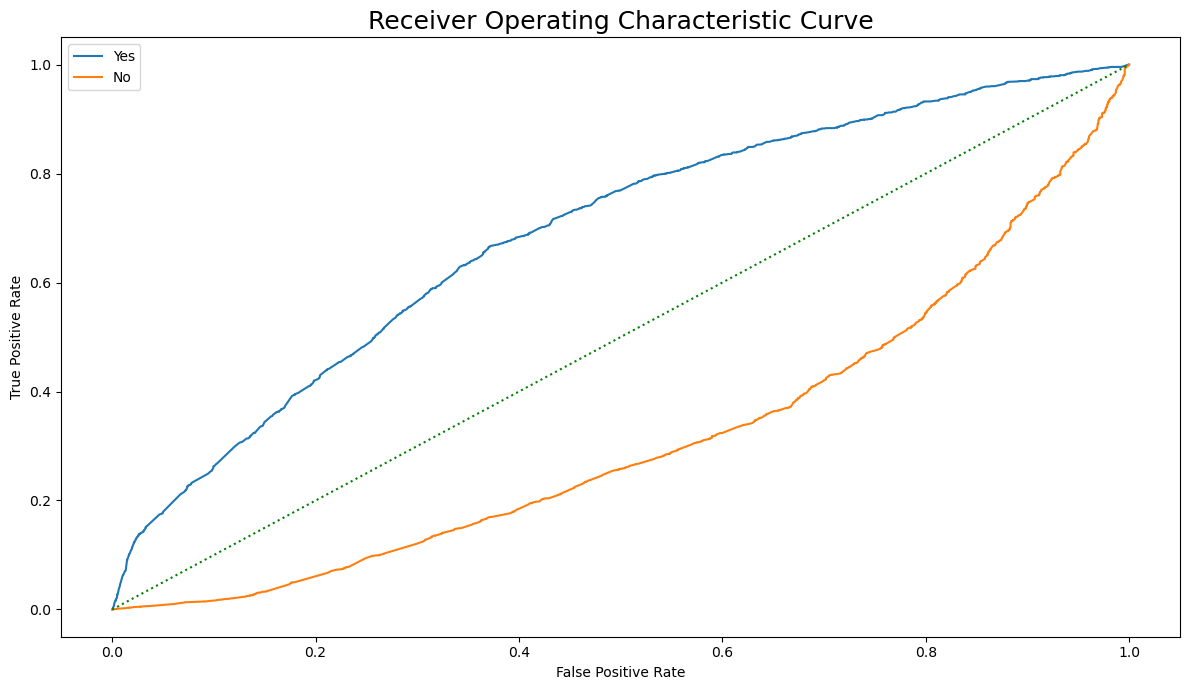

In [89]:
from sklearn import metrics
y_pred_proba = logr.predict_proba(X_test)
yes_probs = y_pred_proba[::,1]

# Build confusion metrics for Yes
#fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba, pos_label='yes')
fpr, tpr, threshold = metrics.roc_curve(y_true=y_test,  y_score=yes_probs, pos_label='yes')
fpr1, tpr1, threshold1 = metrics.roc_curve(y_true=y_test,  y_score=yes_probs, pos_label='no')

#create ROC curve
plt.plot(fpr,tpr, label="Yes")
plt.plot(fpr1,tpr1, label="No")
plt.legend(loc="upper left")
plt.title('Receiver Operating Characteristic Curve', size=18)
plt.plot([0, 1], [0, 1], color='green', linestyle=':')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [91]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_true=y_test, y_score=yes_probs)
print("Area under curve is {:.6f}".format(round(auc, 2)))

Area under curve is 0.690000


### Problem 9: Score the Model

What is the accuracy of your model?

In [93]:
accuracy = accuracy_score(y_test, logr_pred)
precision = precision_score(y_test, logr_pred, average='macro')
recall = recall_score(y_test, logr_pred, average='macro')
f1 = f1_score(y_test, logr_pred, average='macro')

print("Accuracy: {:.6f}".format(accuracy))
print("Precision: {:.6f}".format(precision))
print("Recall: {:.6f}".format(recall))
print("F1-score: {:.6f}".format(f1))

/Users/stephytony/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.887594
Precision: 0.443797
Recall: 0.500000
F1-score: 0.470225


In [95]:
pd.DataFrame({'Model': ['Decision Tree', 'Logistic Regression'], 
             'Accuracy': ['0.887513', '0.887594'],
             'Precision': ['0.443792', '0.443797'],
             'Recall': ['0.499954', '0.500000'],
             'F1_Score': ['0.470202', '0.470225'],
             'Fit_Time (ms)': ['128', '193']})

,Model,Accuracy,Precision,Recall,F1_Score,Fit_Time (ms)
0,Decision Tree,0.887513,0.443792,0.499954,0.470202,128
1,Logistic Regression,0.887594,0.443797,0.500000,0.470225,193


Quick review of this results show that accuracy scores were very close with numbers over 85%, however the recall, precision and F1_Score were below 50%.

This means the classifier has a high number of False negatives which can be an outcome of imbalanced class or untuned model hyperparameters. More likely because of the imbalanced dataset with a higher number of Deposit = No records.

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [97]:
%%time
#Building a Logistic Regression  model

lgr1_pipe = Pipeline ([
    ('transformer', column_trans),
    ('scale', StandardScaler(with_mean=False)),
    ('model', LogisticRegression())
])

# Train the classifiers
lgr1 = lgr1_pipe.fit(X_train, y_train)

# use the model to predict the class labels of the test set:
lgr1_pred = lgr1.predict(X_test)

# Evaluate Training and Test Scores

lgr1_train_score = lgr1.score(X_train, y_train)
print("Training Accuracy Score", lgr1_train_score)

lgr1_test_score = lgr1.score(X_test, y_test)
print("Test Accuracy Score", lgr1_test_score)

Training Accuracy Score 0.8872047448926502
Test Accuracy Score 0.8875940762320952
CPU times: user 357 ms, sys: 22.8 ms, total: 380 ms
Wall time: 419 ms


In [105]:
%%time

#Building a KNN  model

knn_pipe = Pipeline ([
    ('transformer', column_trans),
    ('scale', StandardScaler(with_mean=False)),
    ('model', KNeighborsClassifier())
])

# Train the classifiers
knn = knn_pipe.fit(X_train, y_train)

# use the model to predict the class labels of the test set:
knn_pred = knn.predict(X_test)

# Evaluate Training and Test Scores

knn_train_score = knn.score(X_train, y_train)
print("Training Accuracy Score", knn_train_score)

knn_test_score = knn.score(X_test, y_test)
print("Test Accuracy Score", knn_test_score)

Training Accuracy Score 0.8846033783080711
Test Accuracy Score 0.8807963097839281
CPU times: user 1min 13s, sys: 20 s, total: 1min 33s
Wall time: 1min 43s


In [106]:
%%time
#Building a Decision Tree  model

dtc1_pipe = Pipeline ([
    ('transformer', column_trans),
    ('scale', StandardScaler(with_mean=False)),
    ('model', DecisionTreeClassifier())
])

# Train the classifiers
dtc1 = dtc1_pipe.fit(X_train, y_train)

# use the model to predict the class labels of the test set:
dtc1_pred = dtc1.predict(X_test)

# Evaluate Training and Test Scores

dtc1_train_score = dtc1.score(X_train, y_train)
print("Training Accuracy Score", dtc1_train_score)

dtc1_test_score = dtc1.score(X_test, y_test)
print("Test Accuracy Score", dtc1_test_score)


Training Accuracy Score 0.8911935069890049
Test Accuracy Score 0.8846807477543093
CPU times: user 612 ms, sys: 22.5 ms, total: 634 ms
Wall time: 707 ms


In [107]:
%%time

#Building a SVC model

svm_pipe = Pipeline ([
    ('transformer', column_trans),
    ('scale', StandardScaler(with_mean=False)),
    ('model', SVC())
])

# Train the classifiers
svm = svm_pipe.fit(X_train, y_train)

# use the model to predict the class labels of the test set:
svm_pred = svm.predict(X_test)

# Evaluate Training and Test Scores

svm_train_score = svm.score(X_train, y_train)
print("Training Accuracy Score", svm_train_score)

svm_test_score = svm.score(X_test, y_test)
print("Test Accuracy Score", svm_test_score)

Training Accuracy Score 0.8873087995560335
Test Accuracy Score 0.8875131504410455
CPU times: user 44.4 s, sys: 874 ms, total: 45.3 s
Wall time: 52.6 s


In [108]:
pd.DataFrame({'Model': ['Logistic', 'KNN','Decision Tree', 'SVM'], 
             'Train Time (s)': ['0.322', '55.8', '0.376','24.4'],
             'Train Accuracy': ['0.8872047448926502', '0.8846033783080711', '0.8911935069890049','0.8873087995560335'],
             'Test Accuracy': ['0.8875940762320952', '0.8807963097839281', '0.884761673545359','0.8875131504410455']})

,Model,Train Time (s),Train Accuracy,Test Accuracy
0,Logistic,0.322,0.8872047448926502,0.8875940762320952
1,KNN,55.8,0.8846033783080711,0.8807963097839281
2,Decision Tree,0.376,0.8911935069890049,0.884761673545359
3,SVM,24.4,0.8873087995560335,0.8875131504410455


Looking at the results from the model comparison, Logistic Regression had the best numbers across the three metrics with lowest train time in seconds, highest training and testing accuracy scores.

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [110]:
#Looking up parameters that can be passed to the pipeline
lgr1_pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'transformer', 'scale', 'model', 'transformer__force_int_remainder_cols', 'transformer__n_jobs', 'transformer__remainder', 'transformer__sparse_threshold', 'transformer__transformer_weights', 'transformer__transformers', 'transformer__verbose', 'transformer__verbose_feature_names_out', 'transformer__onehotencoder', 'transformer__ordinalencoder', 'transformer__onehotencoder__categories', 'transformer__onehotencoder__drop', 'transformer__onehotencoder__dtype', 'transformer__onehotencoder__feature_name_combiner', 'transformer__onehotencoder__handle_unknown', 'transformer__onehotencoder__max_categories', 'transformer__onehotencoder__min_frequency', 'transformer__onehotencoder__sparse_output', 'transformer__ordinalencoder__categories', 'transformer__ordinalencoder__dtype', 'transformer__ordinalencoder__encoded_missing_value', 'transformer__ordinalencoder__handle_unknown', 'transformer__ordinalencoder__max_categories', 'transformer__ordinalencoder__mi

In [111]:
pd.DataFrame({'Model': ['Logistic', 'KNN','Decision Tree', 'SVM'], 
             'Train Time (s)': ['64', '302', '15.7','490'],
             'Best Params': ['C:0.001, penalty:l2, solver: liblinear', 'n_neighbors: 17', 'criterion: entropy, max_depth: 1, model__min_samples_leaf: 1','C: 0.1, kernel: rbf'],
             'Best Score': ['0.8872394393842521', '0.8855397848500199', '0.8872394393842521','0.8872394393842521']})

,Model,Train Time (s),Best Params,Best Score
0,Logistic,64,"C:0.001, penalty:l2, solver: liblinear",0.8872394393842521
1,KNN,302,n_neighbors: 17,0.8855397848500199
2,Decision Tree,15.7,"criterion: entropy, max_depth: 1, model__min_s...",0.8872394393842521
3,SVM,490,"C: 0.1, kernel: rbf",0.8872394393842521


Questions
The main question that I have is the imbalanced dataset which is heavily weighted towards the unsuccessful marketing campaigns. If the model is used to determine features that are making the marketing campaign unsuccessful, then the models above could be useful.

Alternatively, the model can be used by the financial institution to understand customer profile that they need to target, for example, there was a high score amongst the "Yes" for customers contacted via Cellular so maybe the Bank can adopt modern features like Text Messages, Social Media platforms (i.e. Facebook, Instagram, Twitter, Tik Tok etc) for marketing campaigns

 

##### Questions